## Least Squares B-Spline Approximation (LSBSA)
### Application of LSBSA to approximate <u>1D curve</u> fitting problem
Authors: *Alireza Amiri-Simkooei, Fatemeh Esmaeili, Roderik Lindenburgh, Delft University of Technology*

Version: *1.0, April 2024*

In [1]:
# import required packages
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy import signal
from scipy.stats.distributions import chi2
from scipy.interpolate import BSpline, PPoly
import scipy.io

C:\Users\AAMIRI~1\AppData\Local\Temp/ipykernel_47340/3125559801.py:7: RuntimeWarning: invalid value encountered in true_divide
  v = np.sin(u) / u + np.sin(u) # a known function as f(u)=sin(u)+sinc(u)


[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26.]


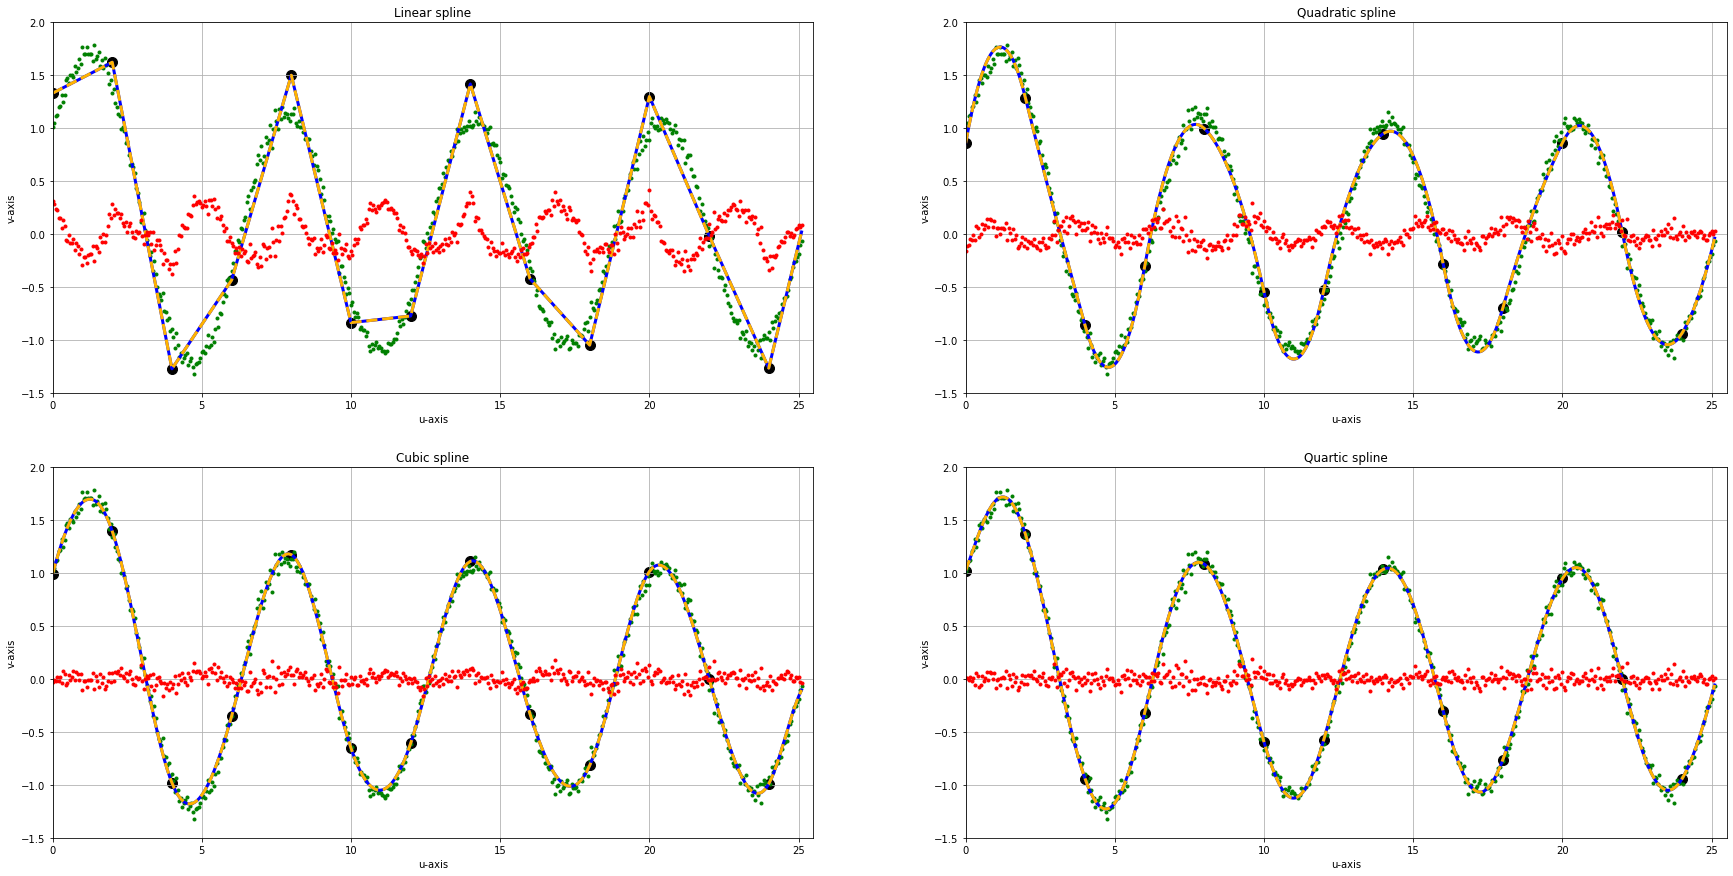

[0.17984329 0.08890429 0.05993648 0.05202441]


In [2]:
# Example on approximation of a known curve using LSBSA
# import least-squares B-spline approximation (LSBSA) functions
import lsbsa_package as bs
# introduce m number of observations
cell = 2
u = np.arange(0, 8*np.pi, 0.05).reshape(-1, 1) # sampling u with interval of du=0.05 from 0 to 8*pi
v = np.sin(u) / u + np.sin(u) # a known function as f(u)=sin(u)+sinc(u)
v[0] = 1
m = len(v) # total number of observations
# adding random noise
v = v + np.random.randn(m, 1) / 20  # add normally distributed noise of std=0.05 to f(u)
# observations are also denoted as y
y = v
# introduce knots intervals
knotu = np.arange(min(u)[0], max(u)[0]+2, cell) # knots u with intervals=2 (make sure all u's fall in these intervals)
print(knotu)

Sig = np.zeros(4)
for i in range(1, 5):
    degu = i
    # establish the design matrix in the model y = Ax+e
    A = bs.A_matrix_1D(u, knotu, degu)
    # apply the least squares method to estimate x, y, e and sigma
    xhat, yhat, ehat, sigma = bs.lsfit(A,y) 
    Sig[i-1] = sigma   
    up = np.arange(0, 8*np.pi, 0.1).reshape(-1, 1) # u_p values with interval du=0.1 from 0 to 8*pi
   # compute the design matrix in the prediction model yp = Ap*xhat
    Ap = bs.A_matrix_1D(up, knotu, degu)
    # predicted values for up
    yp = np.dot(Ap, xhat)
    # plot the results
    plt.subplot(2, 2, i)
    plt.plot(u, y, '.g', markersize=6)
    plt.plot(u, yhat, '-b', linewidth=3)
    plt.plot(up, yp, '--', color=[1, 0.7, 0], linewidth=3)
    plt.plot(u, ehat, '.', color=[1, 0, 0], markersize=6)
    # Added by M. Julseth to visualize knotx
    plt.scatter(knotu[:-1], yhat[np.where(np.isin(u, knotu))], 100, color='k', marker='o') 
    #plt.plot(knotu[:-1], yhat[np.where(np.isin(u, knotu))], color='k', marker='o',markersize=10) 
    plt.xlim([0, 25.5])
    plt.ylim([-1.5, 2.])
    plt.xlabel('u-axis')
    plt.ylabel('v-axis')
    plt.grid(True)
    plt.box(True)
    if i == 1:
        plt.title('Linear spline')
    elif i == 2:
        plt.title('Quadratic spline')
    elif i == 3:
        plt.title('Cubic spline')
    else:
        plt.title('Quartic spline')
    # Adjust figure size for better quality of saved image
    fig = plt.gcf()
    fig.set_size_inches(30, 15)
    # fig.savefig(f'Curve_Fitting{i}.pdf', dpi=300)
plt.show()
print(Sig)
